In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()
plt.style.use("seaborn-poster")
data_exploitable = pd.read_excel('./data_exploitable.xls', index_col=0)

In [2]:
#Sigma Clipping 
q = np.percentile(data_exploitable.P13_POP, [25, 50, 75])
mv = q[1]
sigma = 0.74 * (q[2] - q[0])

In [3]:
data_exploitable_oringinal = data_exploitable.copy()
data_exploitable = data_exploitable_oringinal[( data_exploitable.P13_POP > mv - 5.0 * sigma )  & (data_exploitable.P13_POP < mv + 5.0 * sigma)]

## Analyse en composantes principales

In [4]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [5]:
target = data_exploitable_oringinal["voting_result"]

In [6]:
data = data_exploitable_oringinal.iloc[:, 43:60]

data_2 = data_exploitable_oringinal.select_dtypes(exclude='object')
data_2 = data_2.drop(columns=["Abstentions", "Blancs et nuls", "Choix A", "Choix B", "Percentage_ABSTENTION_VS_POP_TOTAL",
                          "Percentage_BlANC_NUL_VS_POP_TOTAL",
                          "Percentage_CHOIX_A_VS_POP_TOTAL",
                          "Percentage_CHOIX_B_VS_POP_TOTAL", "voting_result"])
data_2 = data_2.loc[:,"Percentage_POP_FEMME_HOMME_19PLUS_VS_POP_TOTAL": "Percentage_INSCRITE_VS_POP_TOTAL"]
data_2 = pd.concat([data_2, data_exploitable_oringinal["MED13"].to_frame(), 
                   data_exploitable_oringinal["P13_POP"]], axis=1)
# data_3 = data_exploitable_oringinal.select_dtypes(exclude='object')
# data_3 = data_3.drop(columns=[""])

In [7]:
scaler = StandardScaler()
data_temp = scaler.fit_transform(data_2)


In [8]:
data_temp = pd.DataFrame(data_temp, columns=data_2.columns)

In [9]:
data_mod = data_2
data= data_temp


In [10]:
#sns.pairplot(data)

In [11]:
data.shape

(30867, 19)

In [12]:
pca = PCA(n_components=2)
data_2D = pca.fit_transform(data)


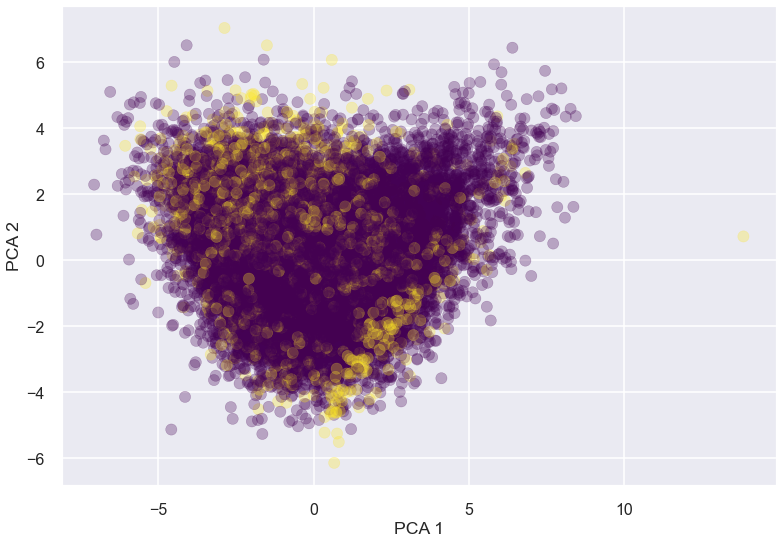

le part de variance expliquée est 0.32


In [13]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(data_2D[:,0], data_2D[:,1], c = target, cmap=plt.cm.viridis_r, alpha=0.3)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')

plt.show()

print("le part de variance expliquée est", round(pca.explained_variance_ratio_.sum(), 2))

**Si on limite pas le nombre de composantes pricipales**

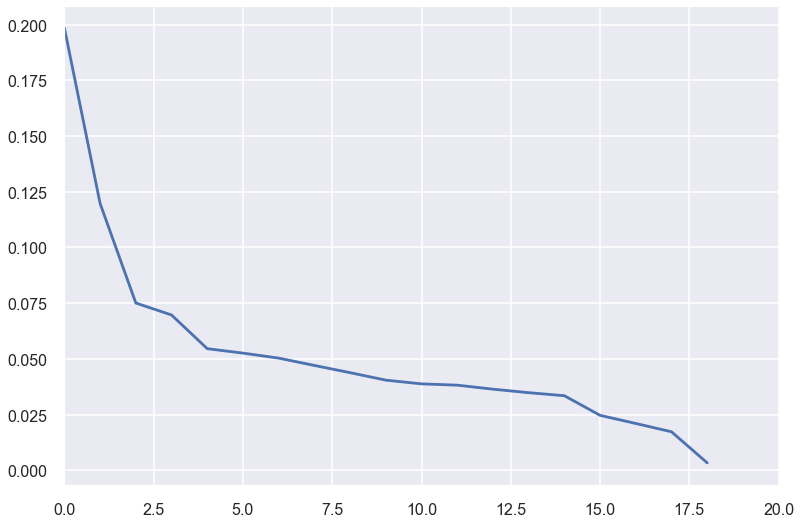

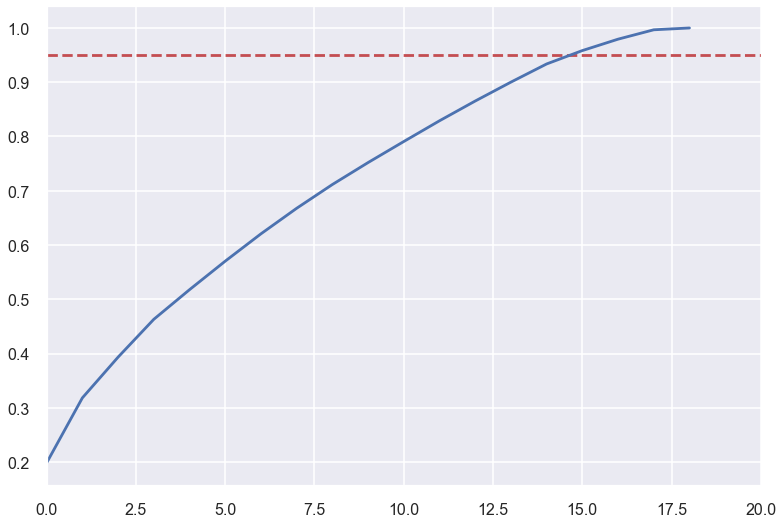

In [14]:
pca = PCA()
pca.fit(data)

plt.figure()
plt.xlim(0,20)
plt.plot(pca.explained_variance_ratio_)

plt.figure()
plt.xlim(0,20)
plt.axhline(y = 0.95, c="r", linestyle="--")
plt.plot(pca.explained_variance_ratio_.cumsum())




In [15]:
pca = PCA(n_components= 0.95)
pca.fit(data)
print("Nombre de composantes retenues : ", pca.n_components_)

Nombre de composantes retenues :  16


In [16]:
pca.components_.shape

(16, 19)

In [17]:
vars(pca)

{'n_components': 0.95,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'random_state': None,
 'feature_names_in_': array(['Percentage_POP_FEMME_HOMME_19PLUS_VS_POP_TOTAL',
        'Percentage_CS_FEMME_HOMME_16PLUS_CS1_VS_POP_TOTAL',
        'Percentage_CS_FEMME_HOMME_16PLUS_CS2_VS_POP_TOTAL',
        'Percentage_CS_FEMME_HOMME_16PLUS_CS3_VS_POP_TOTAL',
        'Percentage_CS_FEMME_HOMME_16PLUS_CS4_VS_POP_TOTAL',
        'Percentage_CS_FEMME_HOMME_16PLUS_CS5_VS_POP_TOTAL',
        'Percentage_CS_FEMME_HOMME_16PLUS_CS6_VS_POP_TOTAL',
        'Percentage_CS_FEMME_HOMME_16PLUS_CS7_VS_POP_TOTAL',
        'Percentage_CS_FEMME_HOMME_16PLUS_CS8_VS_POP_TOTAL',
        'Percentage_DIP_FEMME_HOMME_16PLUS_N0_VS_POP_TOTAL',
        'Percentage_DIP_FEMME_HOMME_16PLUS_N1_VS_POP_TOTAL',
        'Percentage_DIP_FEMME_HOMME_16PLUS_N2_VS_POP_TOTAL',
        'Percentage_DIP_FEMME_HOMME_16PLUS_N3_VS_POP_TOTAL',
        'Percentage_DIP_FEMME_HOMME_16PLUS_N4_V

***
### analyse discriminante linéaire(LDA) 

In [18]:
lda =LDA()
data_lda = lda.fit_transform(data, target)
data_lda.shape

(30867, 1)

**Le LDA n'est adaptée que dans le cas de problèmes de classification supervisée avec des features continues où le nombre de classes à prédire est suffisamment important. C'est un algorithme nettement moins polyvalent que la PCA.**

In [19]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.scatter(data_2D[:,0], data_2D[:,1], c = target, cmap=plt.cm.viridis_r, alpha=0.3)
# plt.show()

# fig= plt.figure()

# ax = fig.add_subplot(111)
# ax.scatter(data_lda[:,0], data_lda[:,0], c = target, cmap=plt.cm.Spectral)
# ax.set_xlabel('LD1')
# ax.set_xlabel('LD2')

***
***

## Random forest classifier

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

**modélisation sans prendre en compte de l'analyse PCA**  

In [21]:
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30867 entries, 0 to 30866
Data columns (total 19 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Percentage_POP_FEMME_HOMME_19PLUS_VS_POP_TOTAL     30867 non-null  float64
 1   Percentage_CS_FEMME_HOMME_16PLUS_CS1_VS_POP_TOTAL  30867 non-null  float64
 2   Percentage_CS_FEMME_HOMME_16PLUS_CS2_VS_POP_TOTAL  30867 non-null  float64
 3   Percentage_CS_FEMME_HOMME_16PLUS_CS3_VS_POP_TOTAL  30867 non-null  float64
 4   Percentage_CS_FEMME_HOMME_16PLUS_CS4_VS_POP_TOTAL  30867 non-null  float64
 5   Percentage_CS_FEMME_HOMME_16PLUS_CS5_VS_POP_TOTAL  30867 non-null  float64
 6   Percentage_CS_FEMME_HOMME_16PLUS_CS6_VS_POP_TOTAL  30867 non-null  float64
 7   Percentage_CS_FEMME_HOMME_16PLUS_CS7_VS_POP_TOTAL  30867 non-null  float64
 8   Percentage_CS_FEMME_HOMME_16PLUS_CS8_VS_POP_TOTAL  30867 non-null  float64
 9   Percen

In [66]:
X_train, X_test, y_train, y_test = train_test_split(data_mod, target, test_size=0.25, random_state=111)

In [68]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [24]:
X_train_scaled.describe()

,Percentage_POP_FEMME_HOMME_19PLUS_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS1_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS2_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS3_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS4_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS5_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS6_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS7_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS8_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N0_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N1_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N2_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N3_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N4_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N5_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N6_VS_POP_TOTAL,Percentage_INSCRITE_VS_POP_TOTAL,MED13,P13_POP
count,2.469300e+04,2.469300e+04,2.469300e+04,2.469300e+04,2.469300e+04,2.469300e+04,2.469300e+04,2.469300e+04,2.469300e+04,2.469300e+04,2.469300e+04,2.469300e+04,2.469300e+04,2.469300e+04,2.469300e+04,2.469300e+04,2.469300e+04,2.469300e+04,2.469300e+04
mean,-1.364388e-15,-2.474251e-16,-2.693321e-16,-2.123060e-16,-3.223347e-16,9.467447e-17,3.414476e-16,-3.080641e-16,-1.162850e-16,-1.795294e-16,9.829608e-17,3.524946e-17,-2.790867e-16,-5.893134e-16,2.936226e-16,-2.291080e-16,6.830212e-16,3.781718e-16,4.421357e-18
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,-6.703342e+00,-7.260442e-01,-1.446656e+00,-1.280170e+00,-2.407713e+00,-3.240942e+00,-2.455554e+00,-2.900003e+00,-2.373219e+00,-1.705721e+00,-1.628913e+00,-1.546836e+00,-3.107076e+00,-2.741192e+00,-2.077162e+00,-1.628615e+00,-6.688565e+00,-3.607014e+00,-1.152210e-01
25%,-6.680252e-01,-7.038904e-01,-6.269562e-01,-6.754736e-01,-6.808942e-01,-5.785411e-01,-6.855956e-01,-6.814138e-01,-6.251525e-01,-6.739329e-01,-6.679016e-01,-6.023944e-01,-5.439542e-01,-5.408097e-01,-6.305613e-01,-6.801497e-01,-6.391656e-01,-6.321951e-01,-1.045611e-01
50%,-3.359607e-02,-3.544789e-01,-1.447286e-01,-2.056709e-01,-1.955915e-02,2.442505e-02,-6.543151e-02,-1.176669e-01,-6.299272e-02,-1.293166e-01,-1.531241e-01,-1.044162e-01,-3.015780e-02,-5.105609e-02,-4.200710e-02,-1.556564e-01,-3.161678e-02,-1.474400e-01,-8.784442e-02
75%,6.353611e-01,2.623673e-01,4.652487e-01,4.583974e-01,6.551640e-01,5.693623e-01,5.912176e-01,5.661431e-01,5.281613e-01,5.249605e-01,4.798414e-01,4.603075e-01,5.051109e-01,4.789156e-01,5.501532e-01,5.046447e-01,6.173835e-01,4.568521e-01,-4.369060e-02
max,4.136295e+00,1.025631e+01,9.994265e+00,8.715631e+00,6.769408e+00,9.884009e+00,6.688963e+00,5.871519e+00,1.067750e+01,8.801642e+00,7.425350e+00,8.520715e+00,9.267809e+00,1.048373e+01,8.940289e+00,8.603428e+00,2.713062e+00,9.081476e+00,1.349225e+02


In [25]:
#Mise en place d'un random forest classifier
clf_rf = RandomForestClassifier()

In [26]:
clf_rf.fit(X_train_scaled,y_train)
y_pred_rf=clf_rf.predict(X_test_scaled)

In [27]:
#Matrice de confusion pour le Random Forest
pd.crosstab(y_test, y_pred_rf, rownames = ['Classe réelle'], colnames = ['Classe prédite'])

Classe prédite,0,1
Classe réelle,,
0,52,844
1,31,5247


In [28]:
clf_rf.score(X_test_scaled, y_test).round(4)

0.8583

In [71]:
#Gridsearch sur RandomForest
param_grid_rf  = [{'n_estimators': [10, 50, 100],
                   'min_samples_leaf': [1, 3, 5],
                   'max_features': ['sqrt', 'log2']}]

gcv_rf = GridSearchCV(clf_rf, param_grid_rf, cv=3)

gcv_results_rf=gcv_rf.fit(X_train_scaled, y_train)

gcv_results_rf.best_params_

{'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 100}

In [30]:
clf_rf=RandomForestClassifier(max_features='log2', min_samples_leaf=3, n_estimators=100)
clf_rf.fit(X_train_scaled, y_train)
y_pred_rf=clf_rf.predict(X_test_scaled)

pd.crosstab(y_test, y_pred_rf,rownames=['réel'],colnames=['prediction'])

prediction,0,1
réel,,
0,45,851
1,25,5253


In [31]:
score_rf=clf_rf.score(X_test_scaled,y_test)
print('Score of opimized Random Forest:',score_rf)

Score of opimized Random Forest: 0.858114674441205


In [32]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.64      0.05      0.09       896
           1       0.86      1.00      0.92      5278

    accuracy                           0.86      6174
   macro avg       0.75      0.52      0.51      6174
weighted avg       0.83      0.86      0.80      6174



In [33]:
target.value_counts(normalize=True)

1    0.855088
0    0.144912
Name: voting_result, dtype: float64

In [34]:
print("le nombre de communes ayant choisi B est", y_train.sum())
print("le nombre de communes ayant choisi A est", len(y_train) - y_train.sum())
print("l'échantillon d'apprentissage contient une disparité entre les deux choix à prédire !")

le nombre de communes ayant choisi B est 21116
le nombre de communes ayant choisi A est 3577
l'échantillon d'apprentissage contient une disparité entre les deux choix à prédire !


## **On doit effecuer un sur-échantillonnage (Oversampling) ou un sous-échantillonnage (Undersampling)**

### oversampling test

In [35]:
target.value_counts()

1    26394
0     4473
Name: voting_result, dtype: int64

In [76]:
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids


In [38]:
print(classification_report_imbalanced(y_test, y_pred_rf))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.64      0.05      1.00      0.09      0.22      0.05       896
          1       0.86      1.00      0.05      0.92      0.22      0.05      5278

avg / total       0.83      0.86      0.19      0.80      0.22      0.05      6174



**Over sampelling using Random Over Sampler and SMOTE**

In [39]:
X_train.shape

(24693, 19)

In [53]:
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train_scaled, y_train)
print("Classes échantillon oversampled :", dict(pd.DataFrame(y_ro).value_counts()))

# SMOTE
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train_scaled, y_train)
print("Classes échantillon SMOTE :", dict(pd.DataFrame(y_sm).value_counts()))

Classes échantillon oversampled : {(0,): 21116, (1,): 21116}
Classes échantillon SMOTE : {(0,): 21116, (1,): 21116}


**entrainer le modèle Randon Forest avec Random Over Sampler**

In [74]:
clf_rf_over_sampled = RandomForestClassifier(max_features='log2', min_samples_leaf=1, n_estimators=100)
clf_rf_over_sampled.fit(X_ro, y_ro)
y_pred_rf_over_sampled = clf_rf_over_sampled.predict(X_test_scaled)

pd.crosstab(y_test, y_pred_rf_over_sampled,rownames=['réel'],colnames=['prediction'])

prediction,0,1
réel,,
0,322,777
1,108,6510


In [75]:
print(classification_report(y_test,y_pred_rf_over_sampled))

              precision    recall  f1-score   support

           0       0.75      0.29      0.42      1099
           1       0.89      0.98      0.94      6618

    accuracy                           0.89      7717
   macro avg       0.82      0.64      0.68      7717
weighted avg       0.87      0.89      0.86      7717



**entrainer le modèle Randon Forest avec SMOTE**

In [72]:
clf_rf_SMOTE = RandomForestClassifier(max_features='log2', min_samples_leaf=1, n_estimators=100)
clf_rf_SMOTE.fit(X_sm, y_sm)
y_pred_rf_SMOTE = clf_rf_SMOTE.predict(X_test_scaled)

pd.crosstab(y_test, y_pred_rf_SMOTE,rownames=['réel'],colnames=['prediction'])

prediction,0,1
réel,,
0,630,469
1,885,5733


In [73]:
print(classification_report(y_test,y_pred_rf_SMOTE))

              precision    recall  f1-score   support

           0       0.42      0.57      0.48      1099
           1       0.92      0.87      0.89      6618

    accuracy                           0.82      7717
   macro avg       0.67      0.72      0.69      7717
weighted avg       0.85      0.82      0.84      7717



### undersampling test

**Under sampelling using Random Under Sampler and Cluster Centroids**

In [77]:
rUs = RandomUnderSampler()
X_ru, y_ru = rUs.fit_resample(X_train_scaled, y_train)
print("Classes échantillon underssampled :", dict( pd.DataFrame(y_ru).value_counts() ))

#Centroides
cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X_train_scaled, y_train)
print("Classes échantillon cluster centroids :", dict( pd.DataFrame(y_cc).value_counts() ))

Classes échantillon underssampled : {(0,): 3374, (1,): 3374}
Classes échantillon cluster centroids : {(0,): 3374, (1,): 3374}


**entrainer le modèle Randon Forest avec Random Under Sampler**

In [78]:
clf_rf_under_sampled = RandomForestClassifier(max_features='log2', min_samples_leaf=1, n_estimators=100)
clf_rf_under_sampled.fit(X_ru, y_ru)
y_pred_rf_under_sampled = clf_rf_under_sampled.predict(X_test_scaled)

pd.crosstab(y_test, y_pred_rf_under_sampled,rownames=['réel'],colnames=['prediction'])

prediction,0,1
réel,,
0,790,309
1,2222,4396


In [80]:
print(classification_report(y_test,y_pred_rf_under_sampled))

              precision    recall  f1-score   support

           0       0.26      0.72      0.38      1099
           1       0.93      0.66      0.78      6618

    accuracy                           0.67      7717
   macro avg       0.60      0.69      0.58      7717
weighted avg       0.84      0.67      0.72      7717



**entrainer le modèle Randon Forest avec Cluster Centroids**

In [82]:
clf_rf_cc = RandomForestClassifier(max_features='log2', min_samples_leaf=1, n_estimators=100)
clf_rf_cc.fit(X_cc, y_cc)
y_pred_rf_cc = clf_rf_cc.predict(X_test_scaled)

pd.crosstab(y_test, y_pred_rf_cc, rownames=['réel'],colnames=['prediction'])


prediction,0,1
réel,,
0,831,268
1,3246,3372


In [83]:
print(classification_report(y_test,y_pred_rf_cc))

              precision    recall  f1-score   support

           0       0.20      0.76      0.32      1099
           1       0.93      0.51      0.66      6618

    accuracy                           0.54      7717
   macro avg       0.57      0.63      0.49      7717
weighted avg       0.82      0.54      0.61      7717



## le modèle Randon Forest avec SMOTE est plus performant. 

Cepandant, la spécificité n'est toujours pas parfaite ! Afin d'améliorer le modèle, on peut par example changer le seuil de probabilité de prédiction pour la classe 0.

In [105]:
threshold = 0.52
probs  = clf_rf_SMOTE.predict_proba(X_test_scaled)
pred_class = (probs[:,1] >= threshold).astype("int")
pd.crosstab(y_test, pred_class, rownames=['réel'],colnames=['prediction'])


prediction,0,1
réel,,
0,646,453
1,941,5677


In [106]:
print(classification_report(y_test,pred_class))

              precision    recall  f1-score   support

           0       0.41      0.59      0.48      1099
           1       0.93      0.86      0.89      6618

    accuracy                           0.82      7717
   macro avg       0.67      0.72      0.69      7717
weighted avg       0.85      0.82      0.83      7717



### Tester un autre modèle de learning : AdaBoost

In [107]:
from sklearn.ensemble import AdaBoostClassifier

In [109]:
ac = AdaBoostClassifier(base_estimator=clf_rf_SMOTE, n_estimators=400)
ac.fit(X_sm, y_sm)
ac.score(X_test_scaled, y_test)

0.8236361280290269

In [111]:
y_pred_ab = ac.predict(X_test_scaled)
pd.crosstab(y_test, y_test_ab, rownames=['réel'],colnames=['prediction'])

prediction,0,1
réel,,
0,646,453
1,908,5710


In [112]:
print(classification_report(y_test,y_pred_ab))

              precision    recall  f1-score   support

           0       0.42      0.59      0.49      1099
           1       0.93      0.86      0.89      6618

    accuracy                           0.82      7717
   macro avg       0.67      0.73      0.69      7717
weighted avg       0.85      0.82      0.84      7717



**Les prédictions sont un peu plus performantes!**

## tester Voting Classifier

In [119]:
from sklearn import neighbors
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

In [117]:
clf_knn_chosen = neighbors.KNeighborsClassifier(metric = 'minkowski', n_neighbors = 1)
clf_rf_chosen  = RandomForestClassifier(max_features='log2', min_samples_leaf=1, n_estimators=100)
clf_svm_chosen = svm.SVC(C = 1, gamma = 0.001, kernel = 'linear')
clf_gb_chosen = GradientBoostingClassifier(learning_rate = 0.01, loss ='deviance', n_estimators=250)

In [121]:
voting_clf = VotingClassifier(estimators=[('knn', clf_knn_chosen), ('rf', clf_rf_chosen), ('svm', clf_svm_chosen), ('gb',clf_gb_chosen), ('adaboost', ac)], voting='hard')
voting_clf.fit(X_sm, y_sm)
y_pred_voting_clf=voting_clf.predict(X_test_scaled)


In [122]:
pd.crosstab(y_test, y_pred_voting_clf, rownames=['réel'],colnames=['prediction'])

prediction,0,1
réel,,
0,691,408
1,1101,5517


In [123]:
print(classification_report(y_test,y_pred_voting_clf))

              precision    recall  f1-score   support

           0       0.39      0.63      0.48      1099
           1       0.93      0.83      0.88      6618

    accuracy                           0.80      7717
   macro avg       0.66      0.73      0.68      7717
weighted avg       0.85      0.80      0.82      7717



#### sauvegarder les modèles entraînés

In [128]:
import pickle

In [135]:
model_list_name = ["clf_rf", "clf_rf_over_sampled", "clf_rf_SMOTE", "clf_rf_under_sampled", "clf_rf_cc", "ac", "voting_clf"]
model_list = [clf_rf, clf_rf_over_sampled, clf_rf_SMOTE, clf_rf_under_sampled, clf_rf_cc, ac, voting_clf]

for (m, n) in zip(model_list, model_list_name):
    pickle.dump(m, open(n+'.pkl', 'wb'))
   

## Interprétabilité du modèle Random Forest avec SHAP

In [124]:
import shap
import skater
import time

2022-02-17 01:18:56.679512: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/wgong/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-02-17 01:18:56.679533: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [125]:
explainer = shap.TreeExplainer(clf_rf_SMOTE)
shap_values = explainer.shap_values(X_test_scaled)

In [146]:
with open('shap_explainer_et_shap_values.pkl', 'wb') as f:
        pickle.dump([explainer, shap_values], f)
    

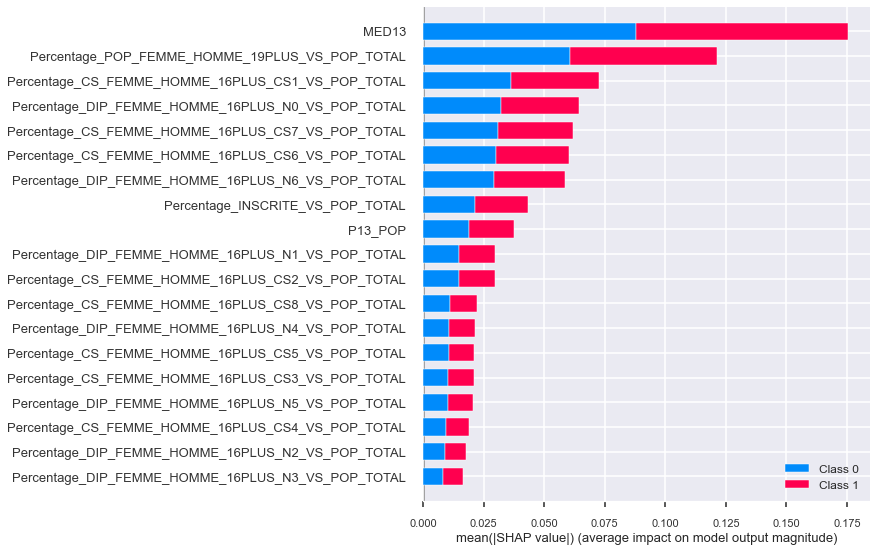

In [127]:
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar")